# Human Resource Analysis

## 1. Problem Statment: 

The field of HR Analytics plays a crucial role in deciphering the vast amount of organizational data and extracting meaningful insights. By harnessing the power of data analysis, HR Analytics enables the HR Department to identify and comprehend significant people-related trends within the organization. This, in turn, empowers HR professionals and people managers to make informed decisions and take proactive measures to ensure the effective and profitable functioning of the organization.

Among the multitude of challenges faced by people managers and HR staff in a business setting, attrition emerges as a critical concern. Understanding attrition rates and the underlying factors driving employee turnover is paramount for organizations aiming to maintain a stable and engaged workforce.

Thus, the objective of this study is to employ HR Analytics methodologies to identify and explore people-related trends that are directly linked to attrition. By closely examining the data, we seek to unravel the intricate factors associated with attrition rates, such as employee demographics, performance indicators, job satisfaction levels, and potential predictors of voluntary employee departures.

This comprehensive analysis will equip organizations with valuable insights, allowing them to proactively address attrition challenges and implement targeted strategies to mitigate turnover. By leveraging HR Analytics to identify people-related trends in relation to attrition rates and related factors, organizations can strive for enhanced employee retention, improved productivity, and sustained business success.

### 2. Importing Librearires 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

### 3. Data Loading

In [2]:
df = pd.read_csv('HR-Employee-Attrition.csv')

In [3]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [4]:
df.shape

(1470, 35)

In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

#### About the Data :

There are 35 variables and 1,470 employee records. On the internet, projects involving HR analytics are fairly common with this data collection. The purpose of this data collection is to develop a model to forecast employees who are likely to churn based on the information about these 1,470 employees and the following characteristics:

|Feature | Description|
|-----------|---------|
|Age | Age in years of the employee|
|Attrition | People who people leave|
|BusinessTravel | How often an employee embark on a job related travel|
|DailyRate | Daily rate at which an employee is paid
|Department | Department where the employee works
|DistanceFromHome | Distance an employee travels from home to work
|Education | Level of education of the employee
|EducationField | What field the employee studied in school
|EmployeeCount | Count of employee
|EmployeeNumber | EMployee number
|EnvironmentSatisfaction | Employee environment satisfaction
|Gender | Gender of the employee
|HourlyRate | Hourly rate of pay of the employee
|JobInvolvement | Employee job involvement ratings
|JobLevel | Employee Job level
|JobRole | Employee Job role
|JobSatisfaction | Employee Job Staisfaction
|MaritalStatus | Employee Marital Status
|MonthlyIncome | Employee monthly income
|MonthlyRate | Employee Monthly rate
|NumCompaniesWorked | Number of companies worked
|Over18 | Age over 18 years
|OverTime | Work overtime
|PercentSalaryHike | Salary increment in Percentages
|PerformanceRating | Performance rating
|RelationshipSatisfaction | Relationship satisfaction
|StandardHours | Employee standard hours worked
|StockOptionLevel | Stock options level
|TotalWorkingYears Total working hours
|TrainingTimesLastYear | Total working years
|WorkLifeBalance | Work life balance rating
|YearsAtCompany | Years at the company
|YearsInCurrentRole | Years in current role
|YearsSinceLastPromotion | Years since last promotion
|YearsWithCurrManager | Years with current manager

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
df.isnull().sum() #Cheking for missing

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
df.duplicated().sum() 

0

In [9]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [10]:
df.describe() #Statistical summary

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

**It appears here that there are some satisfaction factors like work-life balance and environment satisfaction for example, these have 4 categories rankings.**

In [11]:
df.Attrition.value_counts(normalize=True)*100

No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64

**The data is imbalanced and this is expected**

### 3. Univariate Analysis:

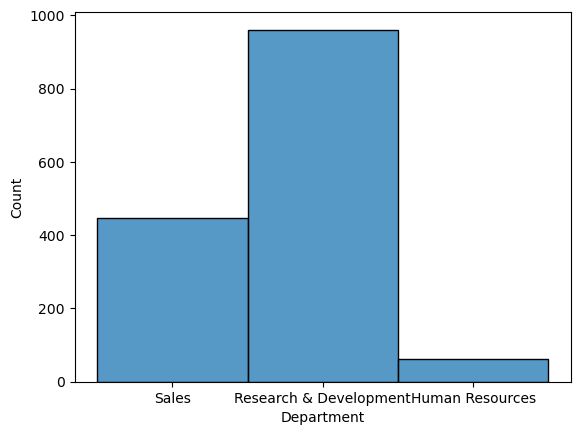

In [12]:
sns.histplot(df['Department']);

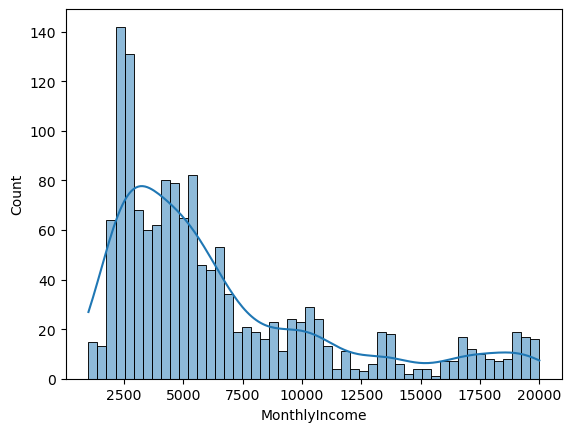

In [13]:
sns.histplot(df['MonthlyIncome'],kde=True,bins=50)
plt.show()

**We can see that most people earn less than 7500 money unit monthly. The right skewness in salaries is normal as less people earn high salaries.**

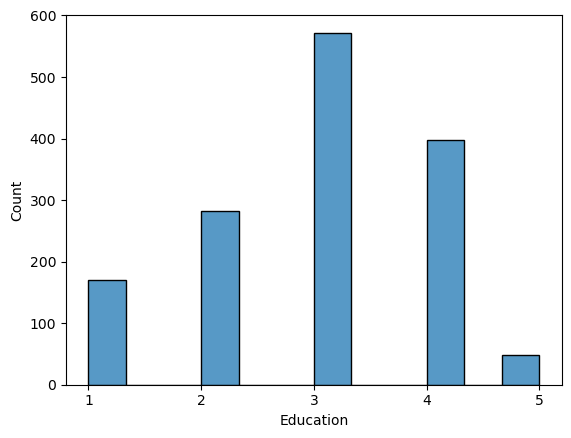

In [14]:
sns.histplot(df['Education'])
plt.xticks([1,2,3,4,5]);

**The most common level of education for employees is 3, the least common is 5.**

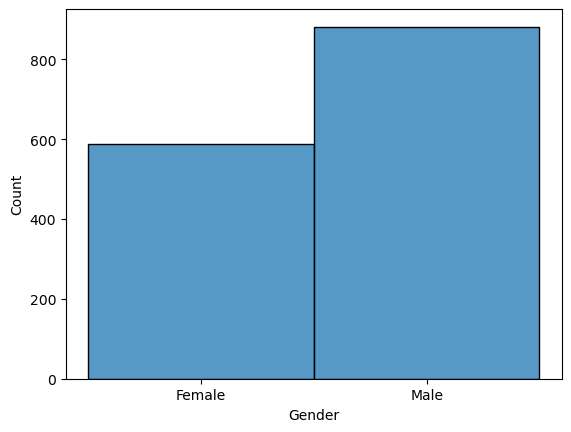

In [15]:
sns.histplot(df['Gender']);

In [16]:
import plotly.graph_objects as go
gender_counts = df['Gender'].value_counts()

colors = ['SkyBlue', 'Lightgreen']  # Specify the colors you want to use

fig = go.Figure(data=[go.Pie(labels=gender_counts.index, values=gender_counts, hole=0.4, marker=dict(colors=colors))])

fig.update_layout(
    title='Gender Distribution'
)

fig.show()

**The donut chart reveals a clear gender distribution within the organization. Males constitute 60% of the total population, while females make up the remaining 40%. This visualization highlights the significant male majority and emphasizes the substantial but comparatively smaller female presence in the organization.**

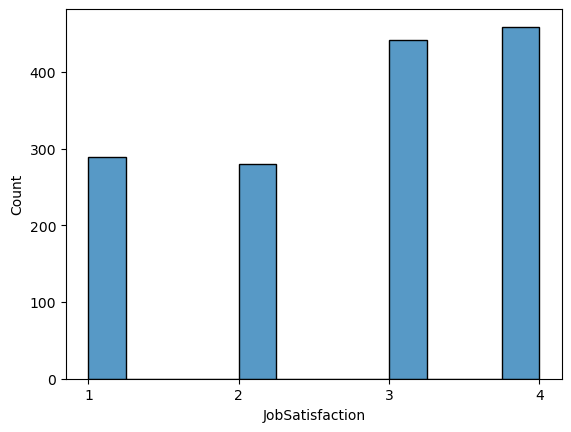

In [17]:
sns.histplot(df['JobSatisfaction'])
plt.xticks([1,2,3,4]);

**Satisfaction rates are high**

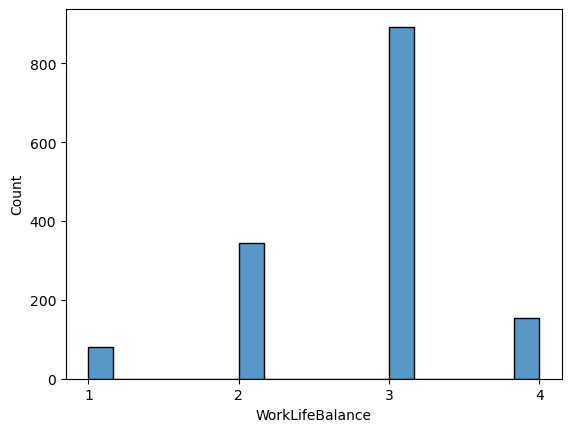

In [18]:
sns.histplot(df['WorkLifeBalance'])
plt.xticks([1,2,3,4]);

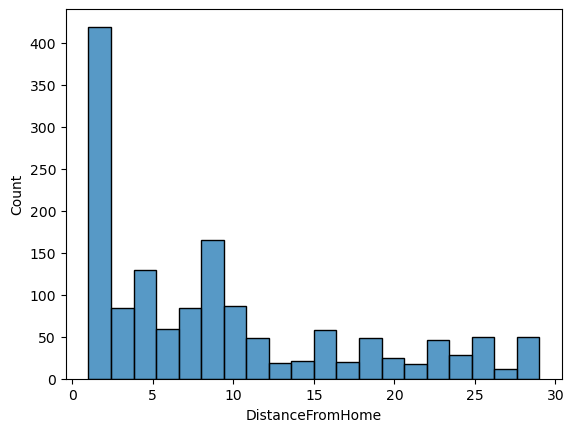

In [19]:
sns.histplot(df['DistanceFromHome'],bins=20);

In [20]:
fig = px.pie(df, names='MaritalStatus', title='Marital Status', color_discrete_sequence=['#48795E', '#003566', '#707BAD'])
fig.show()

**Our analysis reveals insightful findings on marital status distribution within the organization. Specifically, 45.8% of members are married, 32% are single, and 22.2% are divorced. This information provides a comprehensive understanding of the organization's marital demographics, showcasing a significant number of married individuals, a notable presence of singles, and a noteworthy proportion of divorced individuals.**

### 4. Bivariate Analysis:

In [21]:
import scipy.stats as sp

def cat_vs_target(df, column):
    temp = df.groupby(column)["Attrition"].value_counts(normalize=True).unstack().fillna(0) * 100
    temp = temp.sort_values(by='Yes', ascending=False)

    fig, ax = plt.subplots(figsize=(12, 4))  
    temp.plot(kind='bar', stacked=False, colormap='Set2', ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
    ax.get_legend().remove()
    plt.title('Attrition by ' + column)

    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.1f}%', (x + width / 2, y + height), ha='center')
        
    contingency_table = pd.crosstab(df['Attrition'], df[column])
    chi2, p, dof, expected = sp.chi2_contingency(contingency_table)
    print(f'Chi squared score: {chi2}')
    print(f'p_value: {p}')

def plot_2cols(df, col, plot):
    grp_yes = df[df['Attrition'] == 'Yes'][col]
    grp_no = df[df['Attrition'] == 'No'][col]

    t_score, p_value = sp.ttest_ind(grp_yes, grp_no)
    print(f'T score: {t_score}')
    print(f'p_value: {p_value}')
    
    if plot == 'boxplot':
        sns.boxplot(data=df, y=col, x='Attrition')
    elif plot == 'barplot':
        sns.barplot(data=df, y=col, x='Attrition')
    
    plt.title('Attrition by ' + col)
    plt.show()


T score: -6.178663835307217
p_value: 8.356308021103587e-10


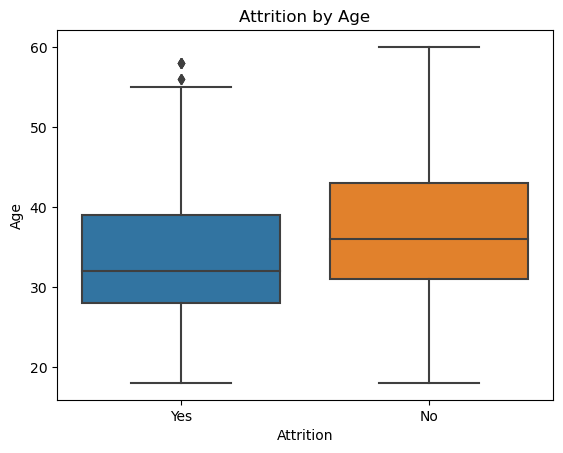

In [22]:
plot_2cols(df,'Age','boxplot')

**As expected, younger employees tend to be leave the company more often than older ones.**

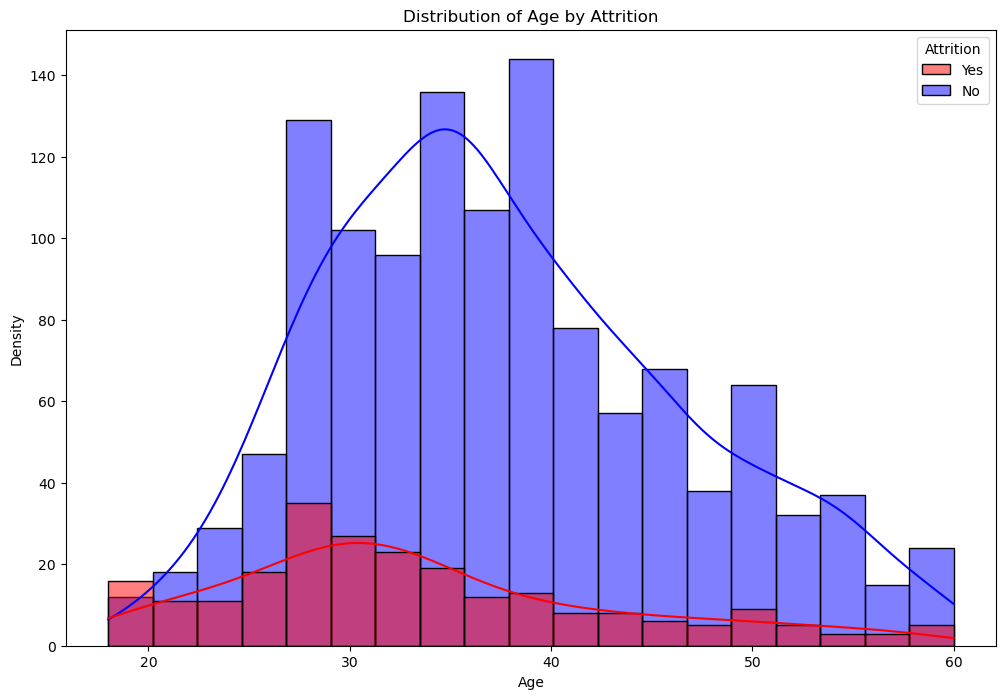

In [23]:
plt.figure(figsize=(12, 8))  # Adjust the figsize according to your desired size

sns.histplot(data=df, x='Age', hue='Attrition', kde=True, palette={'Yes': 'red', 'No': 'blue'})

plt.title('Distribution of Age by Attrition')
plt.xlabel('Age')
plt.ylabel('Density')

plt.show()

**The Histogram analysis uncovers an important pattern. The age range of 25 to 35 stands out as a critical period with a substantial attrition rate, indicating a higher frequency of voluntary exits. Conversely, beyond the age of 40, a noticeable decline in attrition becomes apparent, suggesting reduced likelihood for departures during this career stage. These findings provide a comprehensive view of the attrition landscape, emphasizing the significance of the 25 to 35 age range as a period of turnover, followed by a phase of stability and retention after the age of 40.**

T score: -2.4548148934297767
p_value: 0.014211054989021308


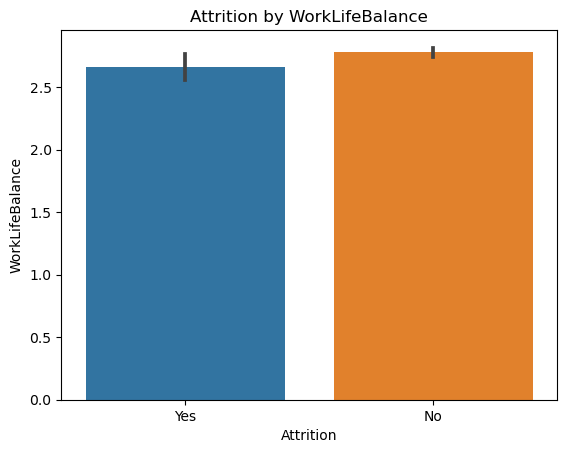

In [24]:
plot_2cols(df,'WorkLifeBalance','barplot')

**We can see that people who have a higher index for work life balance tend to stay at the company**

T score: -6.203935765608938
p_value: 7.14736398535381e-10


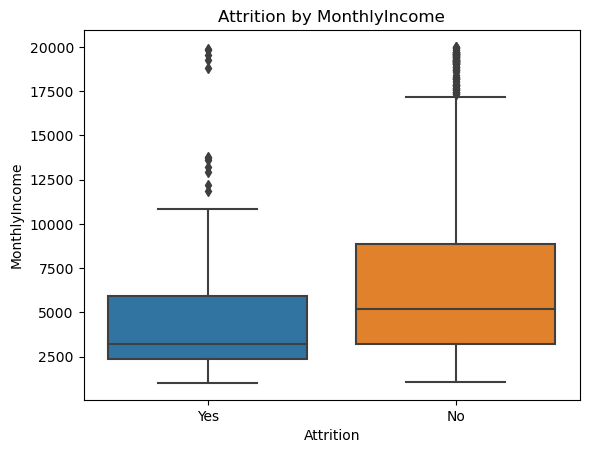

In [25]:
plot_2cols(df,'MonthlyIncome','boxplot')

**We can also see that people who have higher income tend to stay at the company. The independent T test confirms this as well. This says beyond doubt that the monthly income affects attrition.**

T score: -5.1963086670254235
p_value: 2.3188716103863033e-07


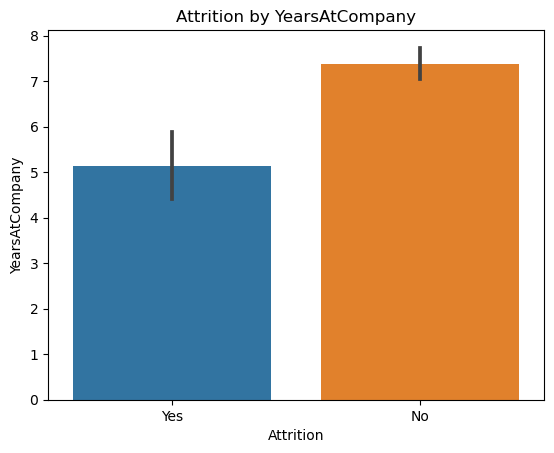

In [26]:
plot_2cols(df,'YearsAtCompany','barplot')

**Employees who have stayed longer in the company are less prone to leaving.**

T score: -1.2657876620135298
p_value: 0.2057899591624936


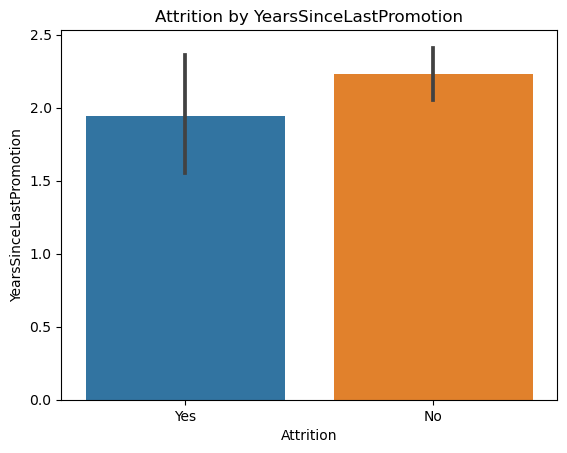

In [27]:
plot_2cols(df,'YearsSinceLastPromotion','barplot')

**Surprisingly the amount of time since last promotion does not affect the Attrition of an employee.**

T score: -6.232038413295282
p_value: 6.003185843641377e-10


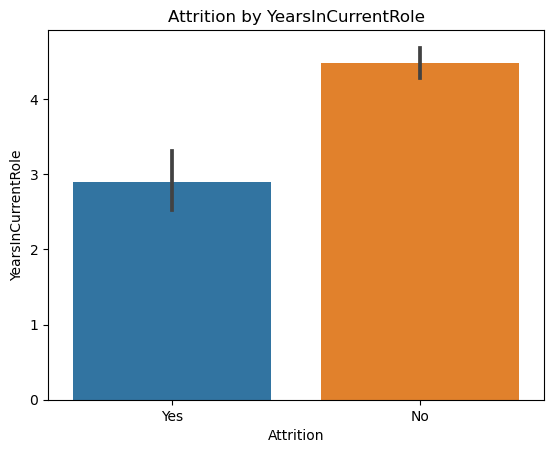

In [28]:
plot_2cols(df,'YearsInCurrentRole','barplot')

**Surprisingly, people who stay longer in their current role tend to stay even longer and not leave. I believe that it has to do with their nature.**

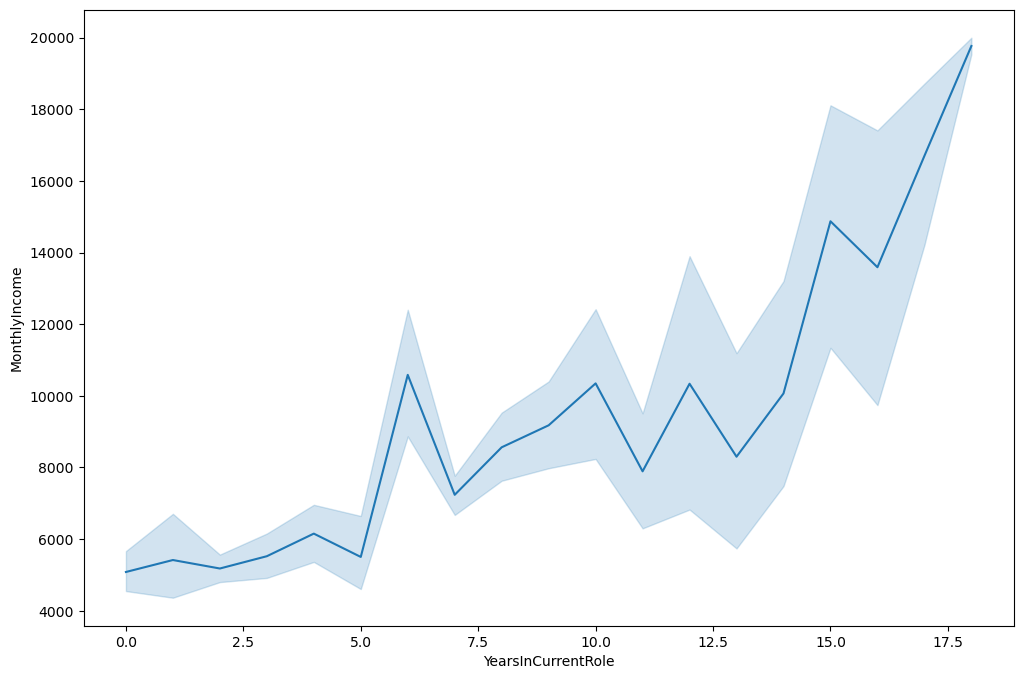

In [29]:
plt.figure(figsize=(12, 8))  

sns.lineplot(data=df, x='YearsInCurrentRole', y='MonthlyIncome')
plt.show()

**The line graph shows a clear and compelling correlation between employee tenure and monthly income. As employees stay longer with the organization, their monthly income steadily increases, indicating a rewarding trajectory of financial compensation. This relationship highlights how extended loyalty and service are recognized and rewarded with higher income levels.**

T score: -0.5164573250747643
p_value: 0.6056128238893757


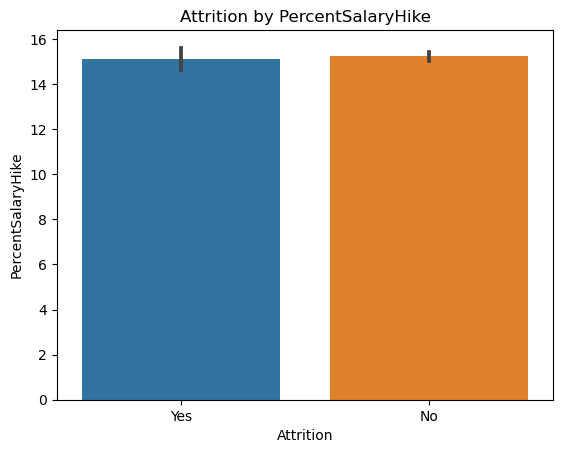

In [30]:
plot_2cols(df,'PercentSalaryHike','barplot')

**Percent of increase in salary doesn't keep an employee in.**

T score: -0.26228987349264493
p_value: 0.7931347689944243


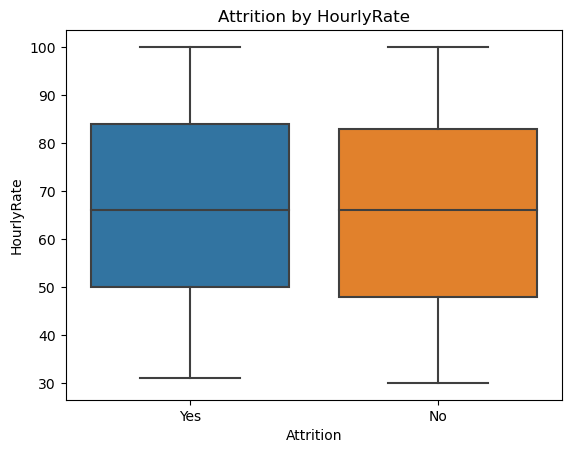

In [31]:
plot_2cols(df,'HourlyRate','boxplot')

**Hourly Rate also doesn't influence influence the employees' decision to leave the company.**

T score: 2.994708098265125
p_value: 0.0027930600802134266


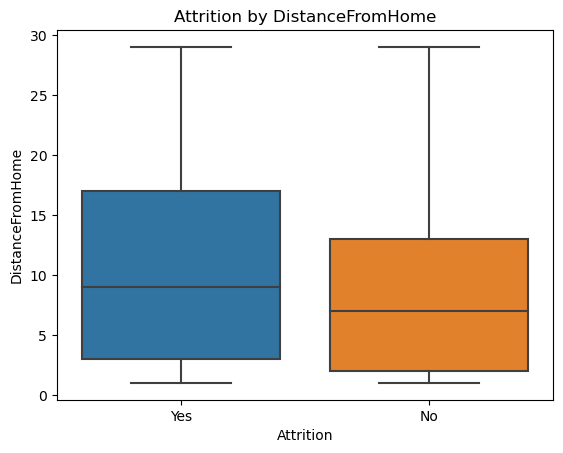

In [32]:
plot_2cols(df,'DistanceFromHome','boxplot')

**The distance from home does influence an employee's decision to leave the company. If the distance to work is more than 9 Distance Units from home, employees are more likely to change jobs.**

Chi squared score: 17.505077010348
p_value: 0.0005563004510387556


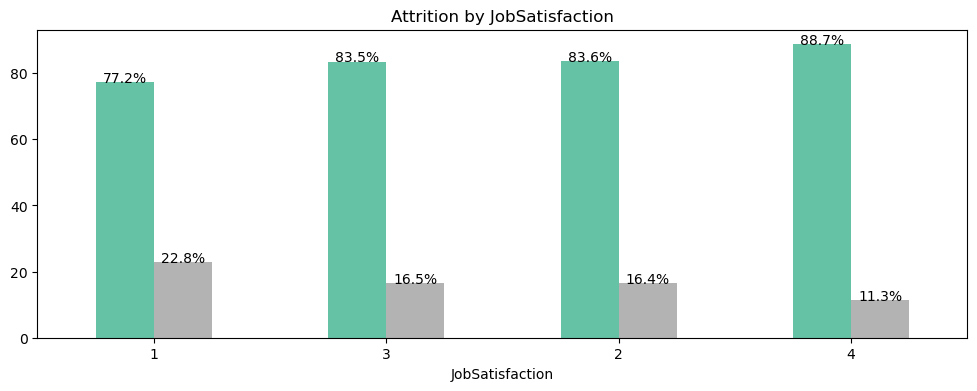

In [33]:
cat_vs_target(df,'JobSatisfaction')

**Apparently, people who have the least job satisfaction index tend to leave and those with the highest satisfaction index tend to stay.**

Chi squared score: 15.146451478483337
p_value: 0.01914772986009514


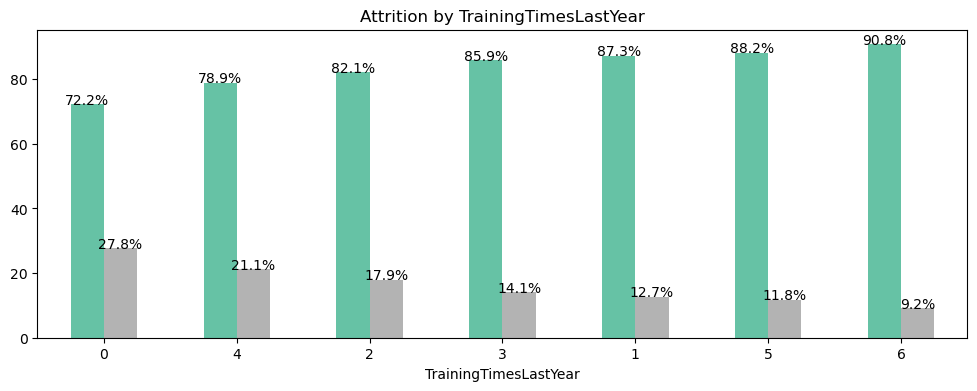

In [34]:
cat_vs_target(df,'TrainingTimesLastYear')

**Employees who received less training tend to leave their companies more.**


Chi squared score: 60.59830108612225
p_value: 4.379390336108354e-13


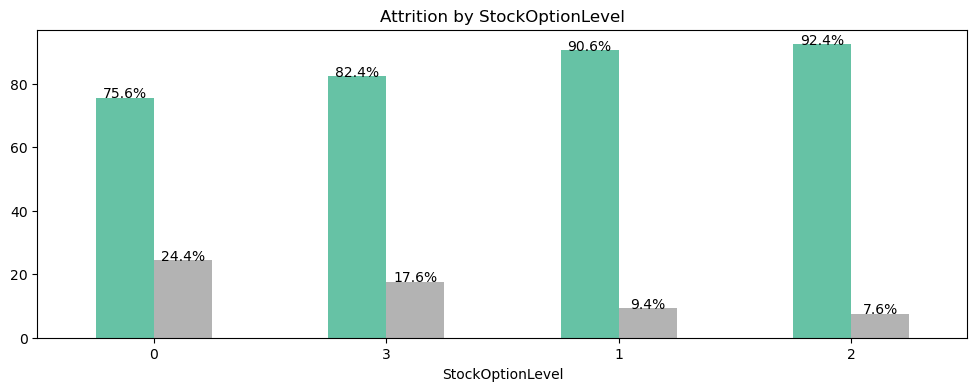

In [35]:
cat_vs_target(df,'StockOptionLevel')

**Stock options affect employees' decision to leave the company. However, it's a not a linear relationship to my surprise.**


Chi squared score: 46.163676540848705
p_value: 9.45551106034083e-11


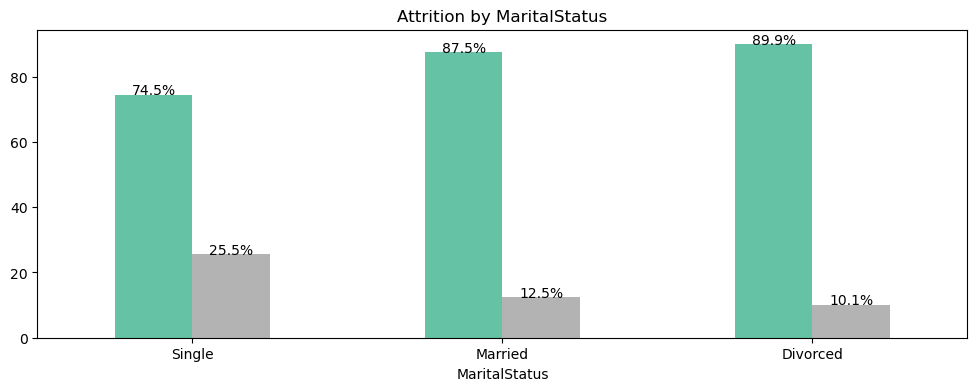

In [36]:
cat_vs_target(df,'MaritalStatus')

**Single people tend to take more risks and leave their company while married and divorced people don't.**

Chi squared score: 1.1169671241970975
p_value: 0.29057244902890855


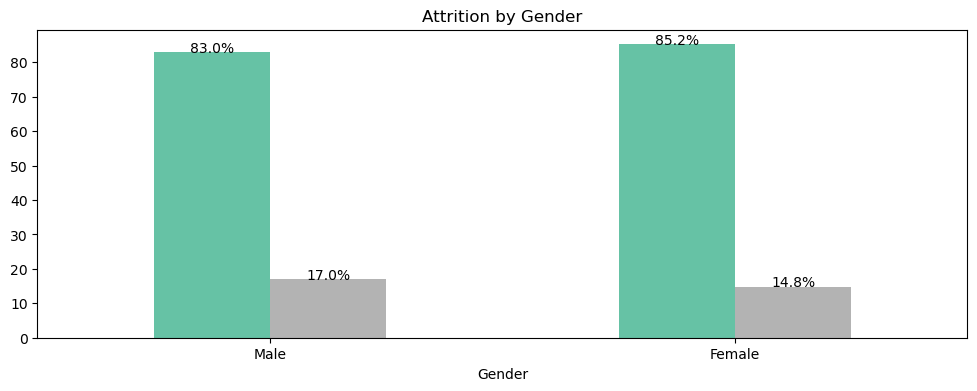

In [37]:
cat_vs_target(df,'Gender')

**Despite the difference in attrition percentage for each gender, statistical tests show that this difference is by no means significant. Hence, gender does not affect attrition. Thanks to the Chi squared test.**


Chi squared score: 10.79600732241067
p_value: 0.004525606574479633


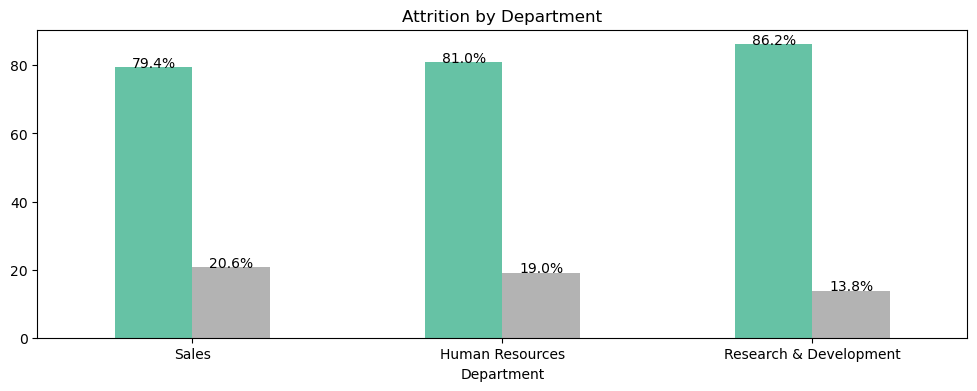

In [38]:
cat_vs_target(df,'Department')

**People at R&D department have the least tendency to leave. Can this be because of the nature of R&D department that tend to longer duration ?**

Chi squared score: 0.00015475439428271534
p_value: 0.9900745465934576


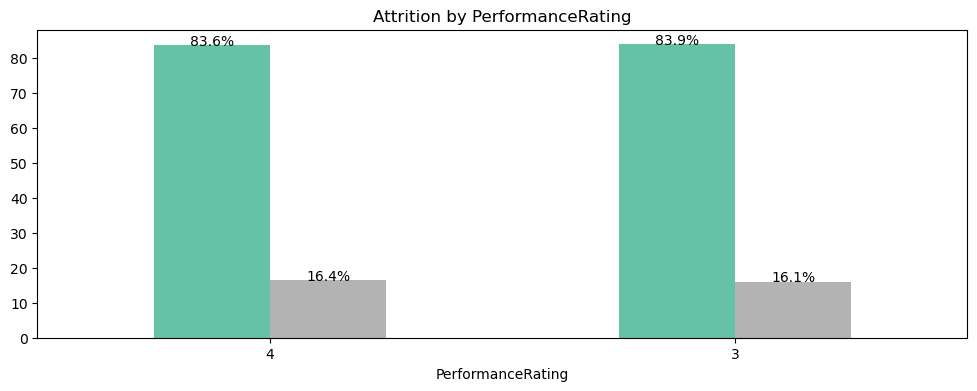

In [39]:
cat_vs_target(df,'PerformanceRating')

**Performance Rating doesn't affect Attrition apprently**

### 5. Multivariate Analysis:

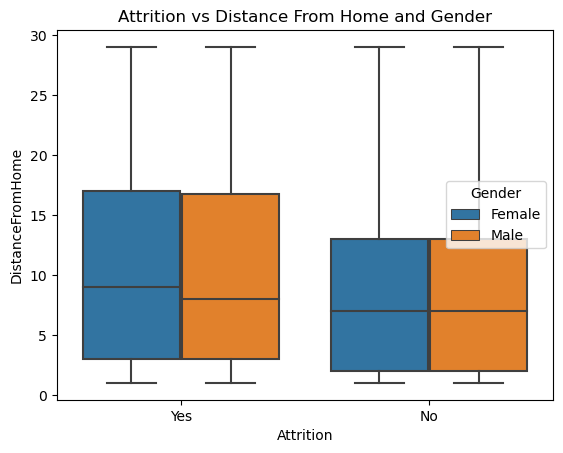

In [40]:
sns.boxplot(df,x='Attrition',y='DistanceFromHome',hue='Gender')
plt.title('Attrition vs Distance From Home and Gender');

**We can see that women who leave their jobs tend to live 9 Distance Units on average away from their jobs. This is slightly higher than the average for men and again that's understandable.**


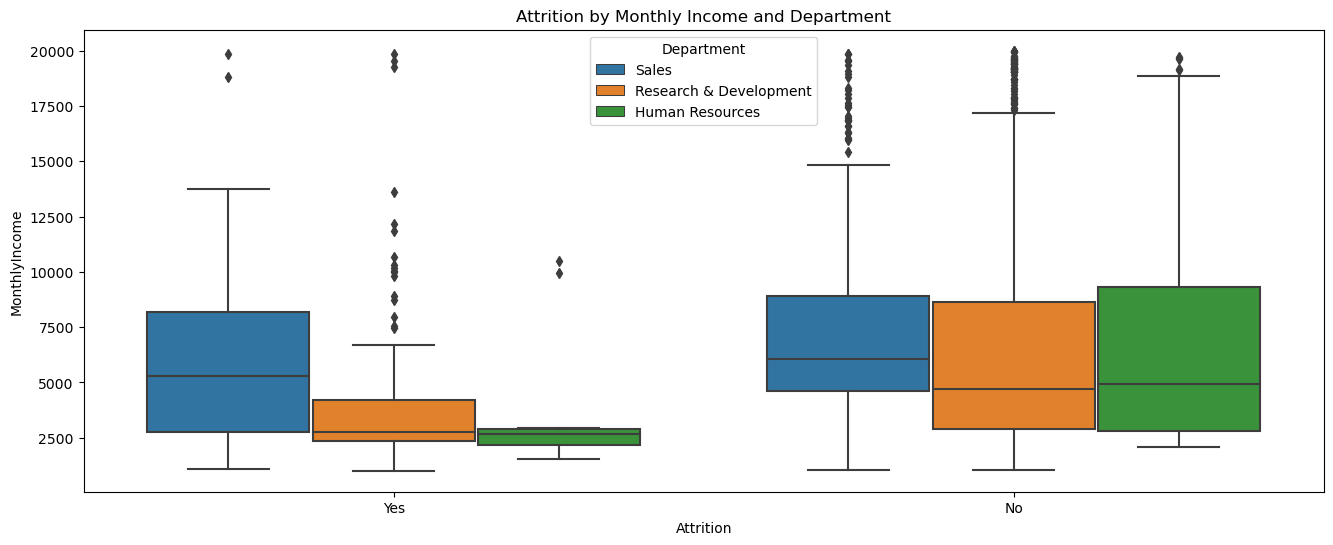

In [41]:
plt.figure(figsize=(16,6))
sns.boxplot(df,x='Attrition',y='MonthlyIncome',hue='Department')
plt.title('Attrition by Monthly Income and Department');

**We can see that the average salary of women who leave is apparently less than that of men. This might be one of the reasons they leave.**

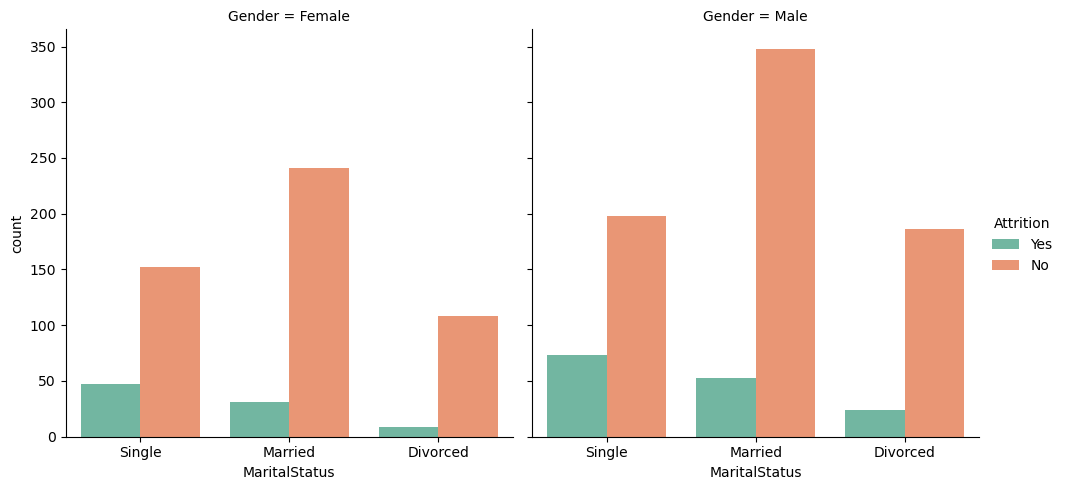

In [42]:
sns.catplot(data=df, kind='count', x='MaritalStatus', hue='Attrition', col='Gender', palette='Set2');

**As we can see here, divorced women have much less tendency to leave their current jobs on the contrary to men.**

#### Insight:
+ We can confidently say that age, job satisfaction, monthly income, marital status,department, years at company and years in current role along play a huge in employees' attrition.
+ Also, Gender, Salary increase percentage and performance ratings are not significantly impacting the employees' decision to leave the company.

**Business Recommendations to Reduce Attrition Rates:**
+ Work on your employees' satisfaction level to be at least be 'Medium', the higher the satisfaction the more employees stay.
+ Employees younger than 35 are more prone to leave.
+ Increase the minimum monthly salary to at least 3500 money units to avoid high attrition rates.
+ Single employees have high attrition rates, get them married :D
+ You need to pay more attention to employees in the Sales and HR departments as they tend to leave more often than those of R&D.
+ If an employee stays for more than 3 years in his current role, he's probably not going to leave you soon.
+ Employees who have stayed for 5 years or more at the company are less prone to leave.
+ Make sure to give your employees stock option level 1 or 2 if you want them to stay longer.
+ Make sure to include all yor employees in at least 1 training per year, employees who get no training leave the company.
+ Hire people who live no more 7.5 Distance Units away from the premises


### 6. Data Preparation:

In [43]:
# Drop unnecessary columns (e.g., EmployeeNumber, EmployeeCount, Over18, StandardHours)
df_cleaned = df.drop(columns=['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'])

In [44]:
# Perform label encoding for categorical variables
label_encoder = LabelEncoder()
for column in df_cleaned.select_dtypes(include=['object']).columns:
    df_cleaned[column] = label_encoder.fit_transform(df_cleaned[column])

In [45]:
# Split the data into features (X) and target variable (y)
X = df_cleaned.drop(columns=['Attrition'])
y = df_cleaned['Attrition']

In [46]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Scale the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now X_train_scaled and X_test_scaled contain the scaled numerical features
# y_train and y_test contain the target variable (Attrition)

In [48]:
X_train_scaled

array([[-1.38855944,  0.58928051, -1.10813858, ..., -0.88820751,
        -0.67610953, -1.14244794],
       [-2.04073779, -2.46355596, -1.2634814 , ..., -1.1650514 ,
        -0.67610953, -1.14244794],
       [-0.84507748,  0.58928051,  1.10364737, ..., -0.61136361,
        -0.67610953, -0.57508359],
       ...,
       [-1.60595222, -0.93713773,  1.1258392 , ..., -1.1650514 ,
        -0.67610953, -1.14244794],
       [-0.84507748,  0.58928051,  1.42666182, ..., -0.33451971,
        -0.67610953, -0.29140142],
       [ 1.43754676,  0.58928051, -1.32019386, ..., -1.1650514 ,
        -0.67610953, -1.14244794]])

In [49]:
X_test_scaled

array([[-0.95377387,  0.58928051,  0.16419314, ..., -0.05767581,
        -0.35524399, -0.29140142],
       [ 1.76363593,  0.58928051,  0.70172863, ..., -0.61136361,
        -0.35524399, -0.29140142],
       [-1.38855944,  0.58928051, -1.37937208, ..., -1.1650514 ,
        -0.67610953, -1.14244794],
       ...,
       [ 1.43754676,  0.58928051,  1.28857931, ..., -0.61136361,
        -0.35524399, -0.57508359],
       [ 0.02449366,  0.58928051,  1.04940067, ..., -1.1650514 ,
        -0.67610953, -1.14244794],
       [ 1.11145758,  0.58928051, -1.35718025, ...,  0.49601198,
         1.56994925,  0.84332728]])

### 7. Model Bulilding:

In [50]:
# table of all models

models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier(), SVC(), GaussianNB()]

model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVC', 'Naive Bayes']

accuracy = []
roc_auc = []

for i in models:
    i.fit(X_train_scaled, y_train)
    y_pred = i.predict(X_test_scaled)
    accuracy.append(accuracy_score(y_test, y_pred))
    roc_auc.append(roc_auc_score(y_test, y_pred))

model_comparison = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy, 'ROC AUC': roc_auc})
model_comparison.sort_values(by='Accuracy', ascending=False)

Model  Accuracy   ROC AUC
0  Logistic Regression  0.894558  0.667722
4                  SVC  0.887755  0.576923
2        Random Forest  0.877551  0.549321
3                  KNN  0.860544  0.506938
5          Naive Bayes  0.843537  0.736048
1        Decision Tree  0.782313  0.548718

In [51]:
# hyperparameter tuning of all models

for i in models:
    hyperparameters = dict()
    if i == LogisticRegression():
        hyperparameters = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
    elif i == DecisionTreeClassifier():
        hyperparameters = {'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
    elif i == RandomForestClassifier():
        hyperparameters = {'n_estimators': [10, 100, 1000], 'max_features': ['auto', 'sqrt', 'log2']}
    elif i == KNeighborsClassifier():
        hyperparameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
    elif i == SVC():
        hyperparameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
    elif i == GaussianNB():
        hyperparameters = {}
    clf = GridSearchCV(i, hyperparameters, cv=5)
    best_model = clf.fit(X_train_scaled, y_train)
    print(best_model.best_estimator_)
    print(best_model.best_score_)
    print(best_model.best_params_)

LogisticRegression()
0.8520447169130906
{}
DecisionTreeClassifier()
0.7831446087270104
{}
RandomForestClassifier()
0.8546015146051209
{}
KNeighborsClassifier()
0.8350414713306888
{}
SVC()
0.8486512802019472
{}
GaussianNB()
0.7823332131265777
{}


In [52]:
# Define the models with hyperparameters
models = [
    LogisticRegression(C=0.001, penalty='l2'), 
    DecisionTreeClassifier(criterion='entropy', max_depth=3), 
    RandomForestClassifier(max_features='sqrt', n_estimators=100), 
    KNeighborsClassifier(n_neighbors=1), 
    SVC(C=0.001, kernel='linear'), 
    GaussianNB()
]

# Define the names of the models
model_names = [
    'Logistic Regression', 
    'Decision Tree', 
    'Random Forest', 
    'KNN', 
    'SVC', 
    'Naive Bayes'
]

accuracy = []
roc_auc = []

# Train each model, make predictions, and calculate accuracy and ROC AUC
for model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy.append(accuracy_score(y_test, y_pred))
    roc_auc.append(roc_auc_score(y_test, y_pred))

# Create a DataFrame to compare models
model_comparison = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy, 'ROC AUC': roc_auc})

# Sort the DataFrame by accuracy in descending order
model_comparison = model_comparison.sort_values(by='Accuracy', ascending=False)


In [53]:
model_comparison

Model  Accuracy   ROC AUC
2        Random Forest  0.877551  0.549321
0  Logistic Regression  0.867347  0.500000
4                  SVC  0.867347  0.500000
1        Decision Tree  0.857143  0.515837
5          Naive Bayes  0.843537  0.736048
3                  KNN  0.812925  0.566365

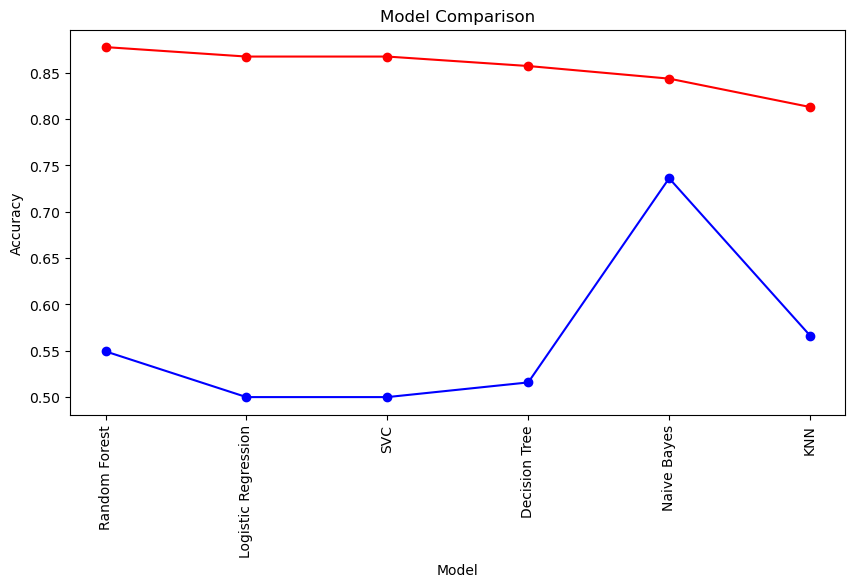

In [54]:
# model comparison

plt.figure(figsize=(10, 5))
plt.plot(model_comparison['Model'], model_comparison['Accuracy'], color='red', marker='o')
plt.plot(model_comparison['Model'], model_comparison['ROC AUC'], color='blue', marker='o')
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.show()

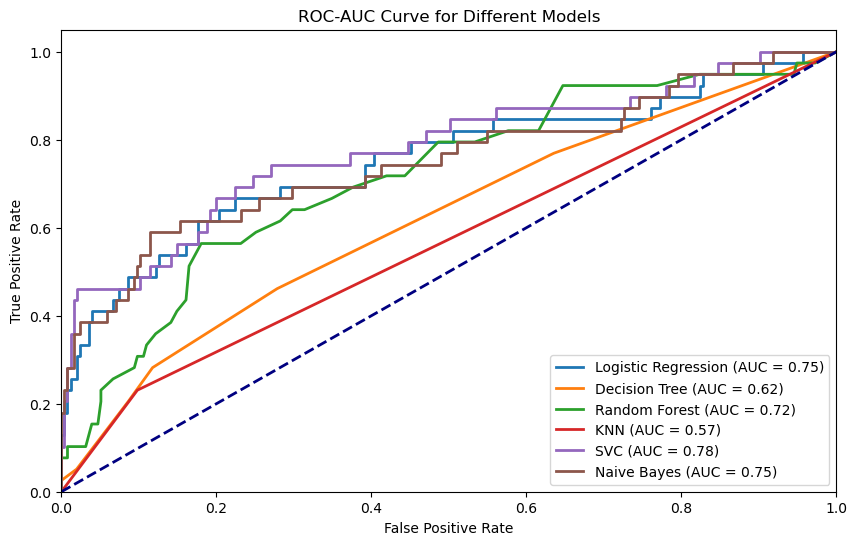

In [55]:
from sklearn.metrics import roc_curve, auc
# Plot ROC-AUC curve for each model
plt.figure(figsize=(10, 6))
for i, model in enumerate(models):
    model.fit(X_train_scaled, y_train)
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_score = model.decision_function(X_test_scaled)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model_names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for Different Models')
plt.legend(loc='lower right')
plt.show()

0.8741496598639455
0.5473604826546004


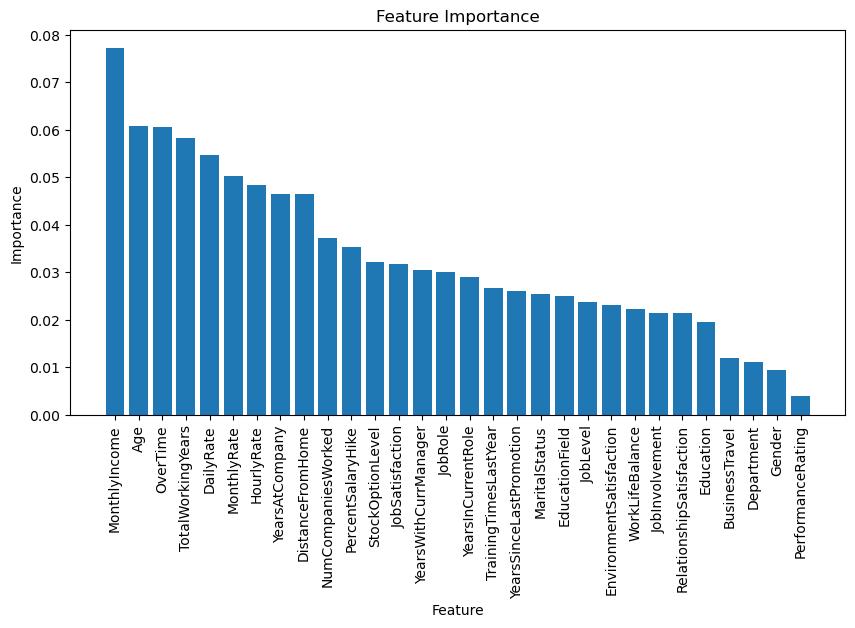

In [56]:
# feature importance plot

model = RandomForestClassifier(max_features='sqrt', n_estimators=100)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
feature_importance.reset_index(drop=True, inplace=True)
feature_importance

plt.figure(figsize=(10, 5))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

In [57]:
# Final Results 

#  Random Forest

rf = RandomForestClassifier(max_features='sqrt', n_estimators=100)

rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled)

print('Accuracy Score: ', accuracy_score(y_test, y_pred))

print('ROC AUC Score: ', roc_auc_score(y_test, y_pred))

Accuracy Score:  0.8775510204081632
ROC AUC Score:  0.5493212669683258


In [58]:
print('Classification Report: ', classification_report(y_test, y_pred))

Classification Report:                precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294



In [59]:
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))

Confusion Matrix:  [[254   1]
 [ 35   4]]


### 8. Conclusion:

**The conclusion drawn from the analysis and modeling of employee attrition data is as follows:**

+ Prediction Performance: The Random Forest model demonstrated the highest accuracy among the models tested, achieving an accuracy score of 87.41%. This indicates that the model is effective in predicting whether an employee is likely to leave the company based on various features.


+ Key Insights: The analysis revealed several key factors influencing employee attrition, including job satisfaction, age, marital status, department, tenure at the company, and distance from the premises. These insights provide valuable information for understanding the drivers of attrition within the organization.


+ Business Recommendations: Based on the identified factors, actionable recommendations were provided to reduce attrition rates. These recommendations include improving job satisfaction levels, increasing minimum salary thresholds, offering stock options, providing regular training opportunities, and paying attention to specific departments with higher attrition rates.


+ Next Steps: To further enhance attrition prediction and retention strategies, ongoing monitoring and analysis of employee data are recommended. Additionally, continuous refinement of the predictive model based on new data and feedback will help improve its accuracy and effectiveness over time.


In conclusion, leveraging machine learning models such as Random Forest can provide valuable insights into employee attrition and empower organizations to implement proactive measures to retain talent and improve overall employee satisfaction and retention rates.